In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [44]:
road = pd.read_csv("road-accidents.csv", comment = '#', sep = '|')

road.head(15)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [46]:
row = road.shape 
row


(51, 5)

In [47]:
road_info = road.info()
 
road_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [50]:
mile_driven = pd.read_csv("miles-driven.csv", sep='|')
mile_driven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [51]:
mile_driven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [55]:
mile_driven.shape

(51, 2)

In [52]:
road.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [56]:
mile_driven.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


<Figure size 1152x432 with 0 Axes>

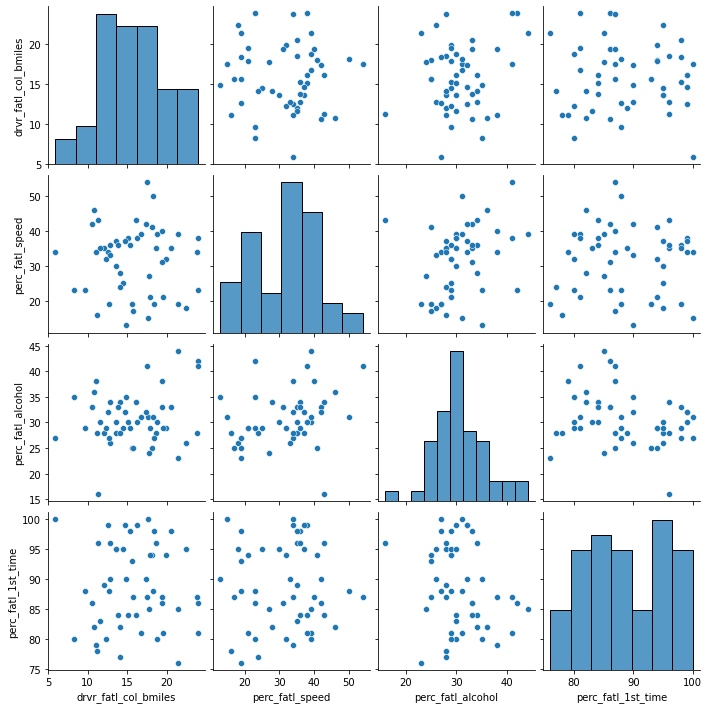

In [59]:
plt.figure(figsize=(16, 6))
sns.pairplot(road)

<AxesSubplot:xlabel='million_miles_annually', ylabel='state'>

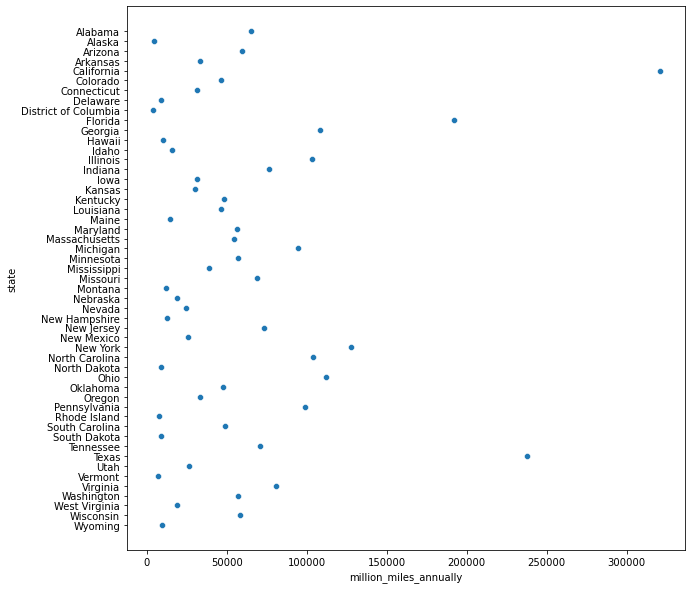

In [62]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=mile_driven['million_miles_annually'], y= mile_driven['state'])

In [63]:
coer = road.corr()
coer

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


<AxesSubplot:>

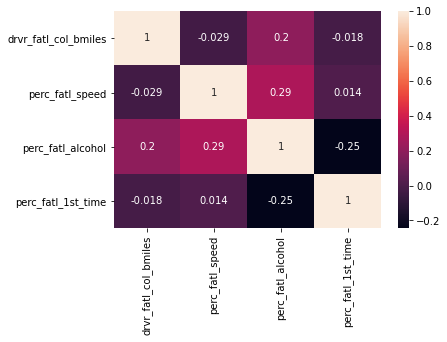

In [64]:
sns.heatmap(data=coer, annot=True)

In [68]:
target_variable = road['drvr_fatl_col_bmiles']
feature_variable = road[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']]
model = LinearRegression()
model.fit(feature_variable, target_variable)

LinearRegression()

In [71]:
model.coef_

array([-0.04180041,  0.19086404,  0.02473301])

In [73]:
ss = StandardScaler()

In [74]:
features_variable_scaled = ss.fit_transform(feature_variable)

In [77]:
features_variable_scaled

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

In [80]:
pca = PCA()
pca.fit(features_variable_scaled)

PCA()

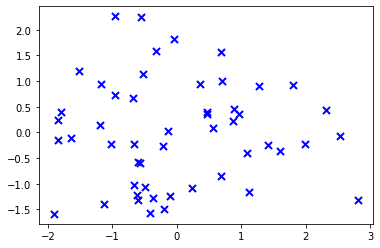

In [107]:
pca= PCA(n_components = 2)
p_comp = pca.fit_transform(features_variable_scaled)
p_comp1 = p_comp[:,0]
p_comp2 = p_comp[:,1]
plt.scatter(p_comp1, p_comp2, c = "blue", linewidths= 2,marker = "x", edgecolor = "green",  s = 50)